# Lab 2: Probability, Distributions, and Statistical Questions
## Problem 1

Probability distribution for  1 day(s): [0.00113 0.00567 0.01655 0.03547 0.06108 0.08867 0.11172 0.12462 0.12487
 0.11363 0.09418 0.07127 0.04909 0.03061 0.01714 0.00852 0.00368 0.00132
 0.00033]
Probability distribution for  2 day(s): [0.00008 0.00057 0.00239 0.00717 0.01713 0.03435 0.05977 0.09217 0.12798
 0.16189 0.18821 0.20246 0.20252 0.18905 0.16506 0.13496 0.10339 0.07417
 0.04974 0.03111 0.01806 0.00967 0.00473 0.00209 0.00082 0.00027 0.00007
 0.00001]
Probability distribution for  3 day(s): [0.00001 0.00008 0.00042 0.00161 0.00489 0.01241 0.02724 0.05292 0.09251
 0.14735 0.21593 0.29333 0.37161 0.44123 0.49292 0.51977 0.51861 0.49057
 0.44056 0.37598 0.30509 0.23542 0.17269 0.12033 0.07955 0.0498  0.02945
 0.0164  0.00856 0.00416 0.00187 0.00077 0.00028 0.00009 0.00002 0.00001
 0.     ]
Probability distribution for  4 day(s): [0.      0.00001 0.00009 0.00041 0.0015  0.00458 0.01207 0.02812 0.05887
 0.11222 0.19673 0.31974 0.48489 0.68982 0.92467 1.17222 1.40978 1.61269
 1.7585

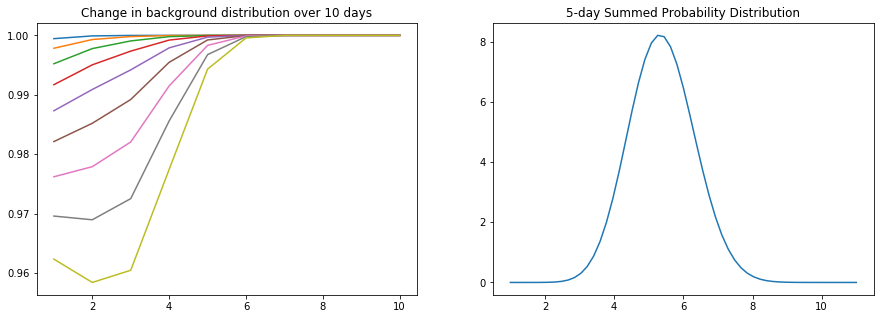

In [449]:
from scipy import stats, signal
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

fig1, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))

x = 5  # 1-day average cosmic-ray background
y = 6 # average number of gamma-rays emitted by hypothetical source

#---- Part A

xlin = np.arange(stats.poisson.ppf(0.01, x),
              stats.poisson.ppf(0.99, x))
pmf = stats.poisson.pmf(xlin, x)
for n in range(1,10):
    ax1.plot(xlin, stats.poisson.cdf(xlin, n*pmf));
    ax1.set_title("Change in background distribution over 10 days");

#---- Part B

plots = []
out = stats.poisson.pmf(xlin, x)
for n in range(1,6):
    out = signal.fftconvolve(out, n*poi)
    plots.append(out)
    print("Probability distribution for ", n, "day(s):", out)
np.set_printoptions(precision=5, suppress=True)
xlin = np.linspace(stats.poisson.ppf(0.01, x),
              stats.poisson.ppf(0.99, x), 55)
ax2.plot(xlin, plots[4]);
ax2.set_title("5-day Summed Probability Distribution");

Here we can see that after 5 days, the convolved Poisson distribution still maintains the structure of a Poisson distribution. Mathematically, the number of days is the trial and is only affecting the magnitude/spread of the distribution. The averages and variance are still the same but only scaled by a factor of days. The average is still at 5.


Probability:  4.551914400963142e-15
Sigma:  -7.751185907593501




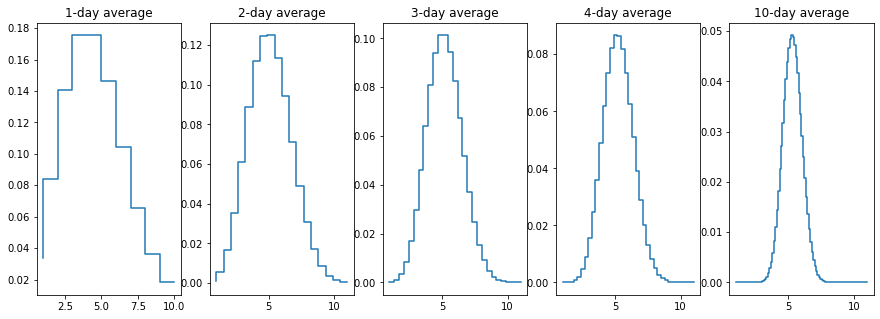

In [451]:
#---- Part C

fig2, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5,figsize=(15,5))

days = []
xlin = np.arange(stats.poisson.ppf(0.01, x),
              stats.poisson.ppf(0.99, x))
# print(stats.poisson.pmf(xlin, x)) # 1 day
for i in range(1,11):
    in1 = stats.poisson.pmf(xlin, x)
    for j in range(1,i):
        # print("Days: ", j+1)
        in1 = signal.fftconvolve(in1, stats.poisson.pmf(xlin,x))
        #  print(signal.fftconvolve(in1, stats.poisson.pmf(xlin,x)))
    days.append(in1)

ax1.step(xlin, days[0])
ax2.step(np.linspace(stats.poisson.ppf(0.01, x), stats.poisson.ppf(0.99, x), 19), days[1])
ax3.step(np.linspace(stats.poisson.ppf(0.01, x), stats.poisson.ppf(0.99, x), 28), days[2])
ax4.step(np.linspace(stats.poisson.ppf(0.01, x), stats.poisson.ppf(0.99, x), 37), days[3])
ax5.step(np.linspace(stats.poisson.ppf(0.01, x), stats.poisson.ppf(0.99, x), 91), days[9])  # 10 days
ax1.set_title("1-day average");
ax2.set_title("2-day average");
ax3.set_title("3-day average");
ax4.set_title("4-day average");
ax5.set_title("10-day average");

#---- Part D

n = 5  # number of days
P = 1 - stats.poisson.cdf(n*y, x)
print("\nProbability: ", P)
sig = stats.norm.ppf(P)
print("Sigma: ", sig)
print("\n")

As the number of days grows, the distribution begins to take the same shape as that of 5-day, approaching a normal distribution where the mean is slightly above 5.

Compared to the central limit theorem, which says that taking sufficiently large random samples from the population will result in normally distributed samples, the increasing number of days does resemble that of a normal distribution with a decreasing standard deviation.

## Problem 2

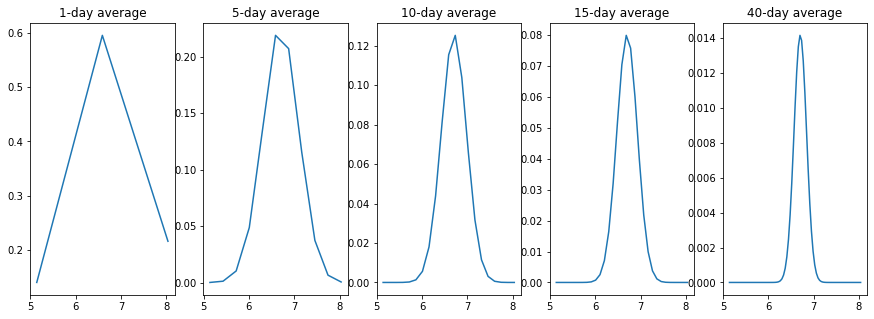

In [452]:
#---- Part A

fig3, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize=(15,5)) 
# xlin = np.linspace(stats.rayleigh.ppf(0.01),
#                 stats.rayleigh.ppf(0.99), 100)
# pdf = stats.rayleigh.pdf(xlin)
# print(pdf)

days = []
xlin = np.arange(stats.rayleigh.ppf(0.01, x),
              stats.rayleigh.ppf(0.99, x))
for i in range(1,41):
    in1 = stats.rayleigh.pdf(xlin, x)
    for j in range(1,i):
        in1 = signal.fftconvolve(in1, stats.rayleigh.pdf(xlin,x))
    days.append(in1)
    
ax1.plot(np.linspace(stats.rayleigh.ppf(0.01, x), stats.rayleigh.ppf(0.99, x), len(days[0])), days[0]);
ax2.plot(np.linspace(stats.rayleigh.ppf(0.01, x), stats.rayleigh.ppf(0.99, x), len(days[4])), days[4]);
ax3.plot(np.linspace(stats.rayleigh.ppf(0.01, x), stats.rayleigh.ppf(0.99, x), len(days[9])), days[9]);
ax4.plot(np.linspace(stats.rayleigh.ppf(0.01, x), stats.rayleigh.ppf(0.99, x), len(days[14])), days[14]);
ax5.plot(np.linspace(stats.rayleigh.ppf(0.01, x), stats.rayleigh.ppf(0.99, x), len(days[39])), days[39]);
ax1.set_title("1-day average");
ax2.set_title("5-day average");
ax3.set_title("10-day average");
ax4.set_title("15-day average");
ax5.set_title("40-day average");

The shape begins to approach a Gaussian distribution after ~40 intervals. Initially, the poisson distribution has a highly linear distribution and as the number of days grows, becomes gradually more normal with decreasing standard deviation. 


&nbsp;
## Problem 3
### Version 1

In [437]:
#---- Part A

x = 10  # width of the background Gaussian distribution
y = 1.9  # signal of strength 

P = 1 - stats.norm.cdf(y, 0, x)  # Integrating from a signal y to inf
print("Probability: ", P)
sigma = stats.norm.ppf(1-P)
print("Sigma:      ", sigma)

Probability:  0.4246545652652045
Sigma:       0.19000000000000014


The detection does not have enough significance to be called a discovery.

### Version 2

In measuring 10k pixels, given that the background distribution has zero-mean and 10 width, what would the background probability distribution be?

pdf$() = 10000\times\frac{e^{-x^2/20}}{10\sqrt{2\pi}}$

In [435]:
#---- Part C

pixels = 10000
prob = 1 - stats.norm.cdf(y, 0, x)
print("Probability: ", prob)
det = stats.norm.ppf(1-(prob/pixels))
print("Sigma: ", stats.norm.ppf(1-(prob/pixels)))

Probability:  0.4246545652652045
Sigma:  3.930042316700621


## Problem 4

In [436]:
#---- Part A

print("Probability of 5 sigma: ", stats.norm.cdf(5))
prob1 = 1 - stats.norm.cdf(y, 0, x)
print("Probability with signal of 1.9: ", prob1)
y2 = -50  # 5-sigma of Gaussian where width is 10 (5*10=50)
prob2 = 1 - stats.norm.cdf(y2, 0, x)
print("Probability with signal of ", y2, ": ", prob2)

#---- Part B

print("\nProbability of 5 sigma: ", stats.norm.cdf(-2.75))
prob1 = 1 - stats.norm.cdf(y, 0, x)
print("Probability with signal of 1.9: ", prob1)
y3 = 27.5
prob3 = 1 - stats.norm.cdf(y3, 0, x)
print("Probability with signal of ", y3, ": ", prob3)

Probability of 5 sigma:  0.9999997133484281
Probability with signal of 1.9:  0.4246545652652045
Probability with signal of  -50 :  0.9999997133484281

Probability of 5 sigma:  0.002979763235054555
Probability with signal of 1.9:  0.4246545652652045
Probability with signal of  27.5 :  0.0029797632350545555


C)

The signal with a trials factor of 10k is about 1.55 times brighter. Multiplying the probability distribution also changes the standard deviation by the same quantity. Thus, the sensitivity to signals is only lowered slightly as the range of standard deviations shifts further away from the mean.


In [433]:
pixels = 10000
det = stats.norm.ppf(1-(prob2/pixels))
ans = (1-stats.norm.cdf(det)) * pixels
print(ans)

pixels = 1000000
det = stats.norm.ppf(1-(prob2/pixels))
ans = (1-stats.norm.cdf(det)) * pixels
print(ans)

0.9999999999998899
1.0000000000287557


D)

Changing trials factor significantly has minimal effect on 5-sigma sensitivity threshold.